<a href="https://colab.research.google.com/github/NotHumans211/Project-Jupyter-Notebook/blob/main/Crude_Oil_Price.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

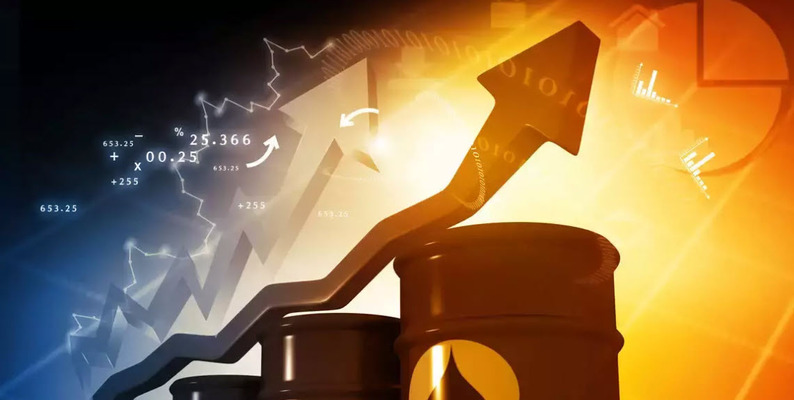



#Oil price is a very important part of any county's economy. The Crude Oil WTI (USD/Bbl) dataset was created with the expectation to understand the impact of global oil prices on any country's economy.

Dataset : https://www.kaggle.com/datasets/sc231997/crude-oil-price


create by **Moh Yahya**

#1. Handling Missing Values


In [99]:
import pandas as pd

# Load the uploaded dataset
file_path = 'oil/crude-oil-price.csv'
oil_df = pd.read_csv(file_path)

# Display the first few rows and general information about the dataset
oil_df.info(), oil_df.head()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 496 entries, 0 to 495
Data columns (total 4 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   date           496 non-null    object 
 1   price          496 non-null    float64
 2   percentChange  495 non-null    float64
 3   change         495 non-null    float64
dtypes: float64(3), object(1)
memory usage: 15.6+ KB


(None,
                         date  price  percentChange  change
 0  1983-06-01 00:00:00+00:00  31.38            NaN     NaN
 1  1983-07-01 00:00:00+00:00  32.00          1.976    0.62
 2  1983-08-01 00:00:00+00:00  31.59         -1.281   -0.41
 3  1983-09-01 00:00:00+00:00  30.36         -3.894   -1.23
 4  1983-10-01 00:00:00+00:00  30.37          0.033    0.01)

In [100]:
# Check the data types of the columns
print(oil_df.dtypes)

# Check for missing values
print(oil_df.isnull().sum())

date              object
price            float64
percentChange    float64
change           float64
dtype: object
date             0
price            0
percentChange    1
change           1
dtype: int64


In [101]:
# Ensure 'date' is in datetime format
oil_df['date'] = pd.to_datetime(oil_df['date'], errors='coerce')

# Drop any rows where 'date' or 'price' is missing
oil_df = oil_df.dropna(subset=['date', 'price'])

# Ensure the 'price' column is numeric
oil_df['price'] = pd.to_numeric(oil_df['price'], errors='coerce')

# Drop any rows where 'price' couldn't be converted to numeric
oil_df = oil_df.dropna(subset=['price'])

#Time Series Plot


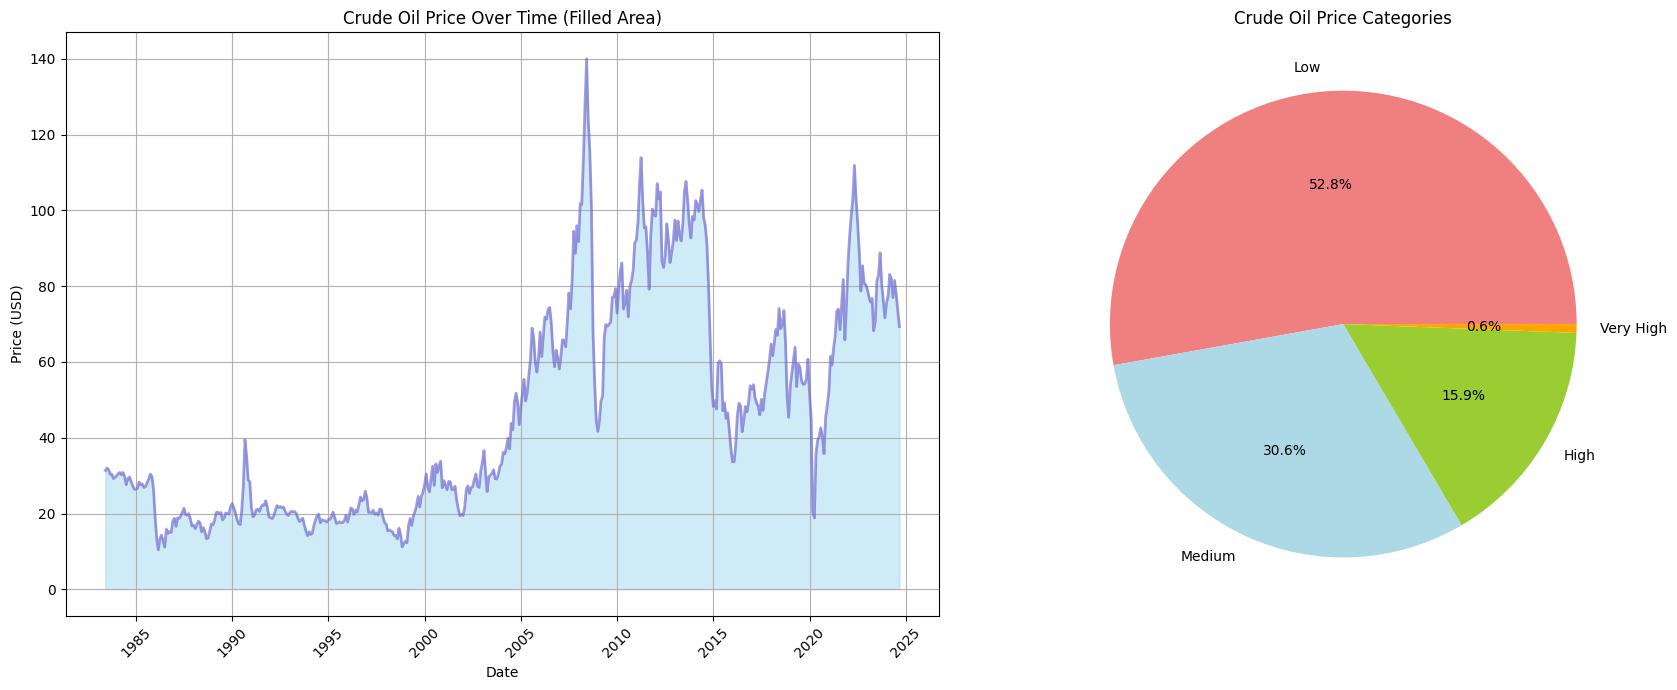

In [102]:
import pandas as pd
import matplotlib.pyplot as plt

# Sample data (replace this with your actual data)
# oil_df = pd.read_csv('your_data.csv')

# Ensure 'date' is in datetime format
oil_df['date'] = pd.to_datetime(oil_df['date'], errors='coerce')

# Drop any rows where 'date' or 'price' is missing
oil_df.dropna(subset=['date', 'price'], inplace=True)

# Create price categories for pie chart
oil_df['price_category'] = pd.cut(oil_df['price'], bins=[0, 40, 80, 120, 160], labels=['Low', 'Medium', 'High', 'Very High'])

# Count the occurrences in each category
price_category_counts = oil_df['price_category'].value_counts()

# Create a figure with two subplots
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(18, 7))

# Line plot with filled area
ax1.fill_between(oil_df['date'], oil_df['price'], color='skyblue', alpha=0.4)
ax1.plot(oil_df['date'], oil_df['price'], color='Slateblue', alpha=0.6, linewidth=2)
ax1.set_title('Crude Oil Price Over Time (Filled Area)')
ax1.set_xlabel('Date')
ax1.set_ylabel('Price (USD)')
ax1.grid(True)
ax1.tick_params(axis='x', rotation=45)

# Pie chart
ax2.pie(price_category_counts, labels=price_category_counts.index, autopct='%1.1f%%', colors=['lightcoral', 'lightblue', 'yellowgreen', 'orange'])
ax2.set_title('Crude Oil Price Categories')

# Adjust layout and show plots
plt.tight_layout()
plt.show()


#Basic Statistics


In [103]:
# Basic statistics
statistics = oil_df[['price', 'percentChange', 'change']].describe()
print(statistics)

            price  percentChange      change
count  496.000000     495.000000  495.000000
mean    46.415631       0.697885    0.076666
std     29.054555      10.501306    4.973253
min     10.420000     -54.245000  -32.830000
25%     20.420000      -5.509000   -1.755000
50%     33.785000       0.886000    0.240000
75%     69.560000       6.344500    2.395000
max    140.000000      88.376000   16.650000


#Correlation Analysis


                  price  percentChange    change
price          1.000000       0.060316  0.087618
percentChange  0.060316       1.000000  0.826435
change         0.087618       0.826435  1.000000


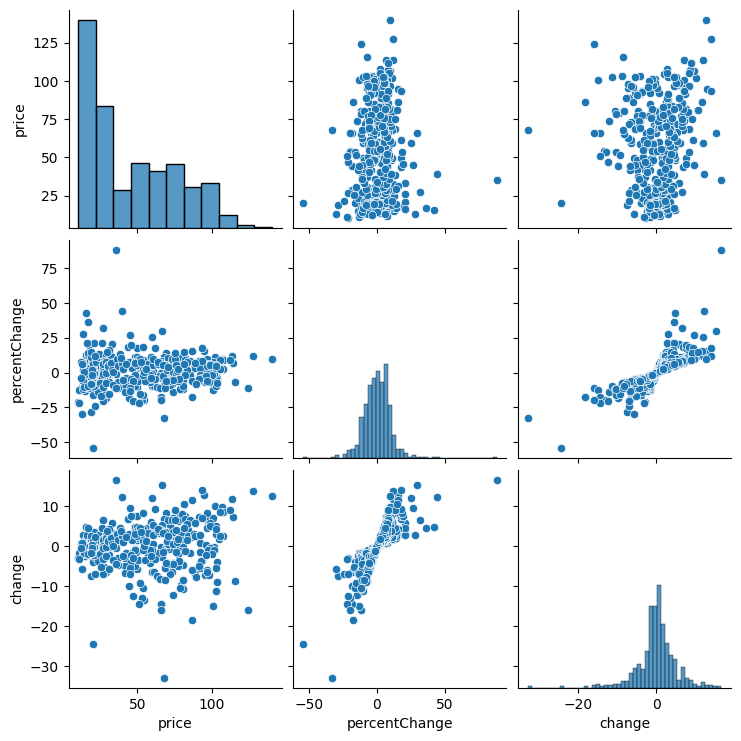

In [104]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming oil_df is already loaded and processed

# Correlation analysis
correlation = oil_df[['price', 'percentChange', 'change']].corr()
print(correlation)

# Alternative visualization using a pairplot
sns.pairplot(oil_df[['price', 'percentChange', 'change']])
plt.show()

#Moving Average Calculation


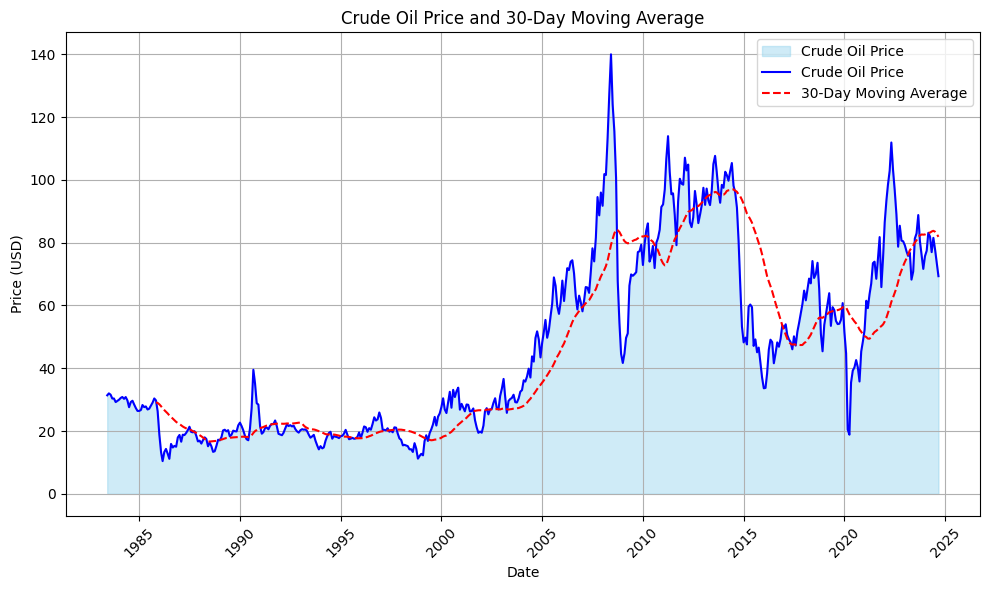

In [105]:
import pandas as pd
import matplotlib.pyplot as plt

# Ensure 'date' is in datetime format
oil_df['date'] = pd.to_datetime(oil_df['date'], errors='coerce')

# Drop any rows where 'date' or 'price' is missing
oil_df.dropna(subset=['date', 'price'], inplace=True)

# Calculate 30-day moving average
oil_df['price_30_MA'] = oil_df['price'].rolling(window=30).mean()

# Plot with area highlighting
plt.figure(figsize=(10, 6))
plt.fill_between(oil_df['date'], oil_df['price'], color='skyblue', alpha=0.4, label='Crude Oil Price')
plt.plot(oil_df['date'], oil_df['price'], color='b', label='Crude Oil Price')
plt.plot(oil_df['date'], oil_df['price_30_MA'], 'r--', label='30-Day Moving Average')
plt.title('Crude Oil Price and 30-Day Moving Average')
plt.xlabel('Date')
plt.ylabel('Price (USD)')
plt.grid(True)
plt.legend()
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


#Seasonal Decomposition


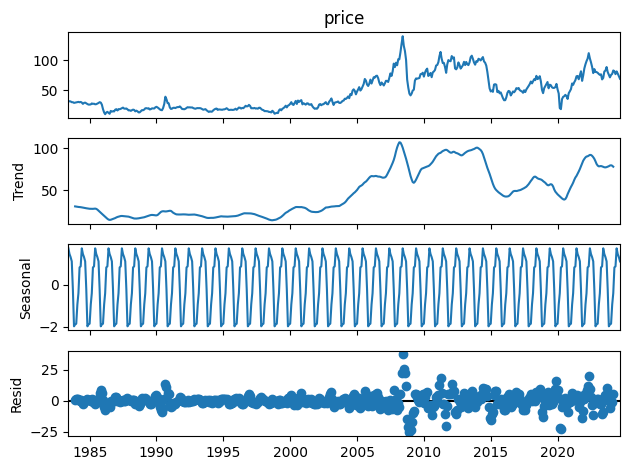

In [106]:
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.seasonal import seasonal_decompose

# Ensure 'date' is in datetime format
oil_df['date'] = pd.to_datetime(oil_df['date'], errors='coerce')
oil_df.set_index('date', inplace=True)

# Seasonal decomposition
decomposition = seasonal_decompose(oil_df['price'], model='additive')
fig = decomposition.plot()
plt.show()


In [115]:
# Reset the index to make 'date' a regular column again
oil_df.reset_index(inplace=True)

# Now you can access the 'date' column and check its data type
print(oil_df['date'].dtype)

datetime64[ns, UTC]


In [117]:
# Misalnya formatnya adalah 'DD-MM-YYYY'
oil_df['date'] = pd.to_datetime(oil_df['date'], format='%d-%m-%Y', errors='coerce')

#Volatility Analysis

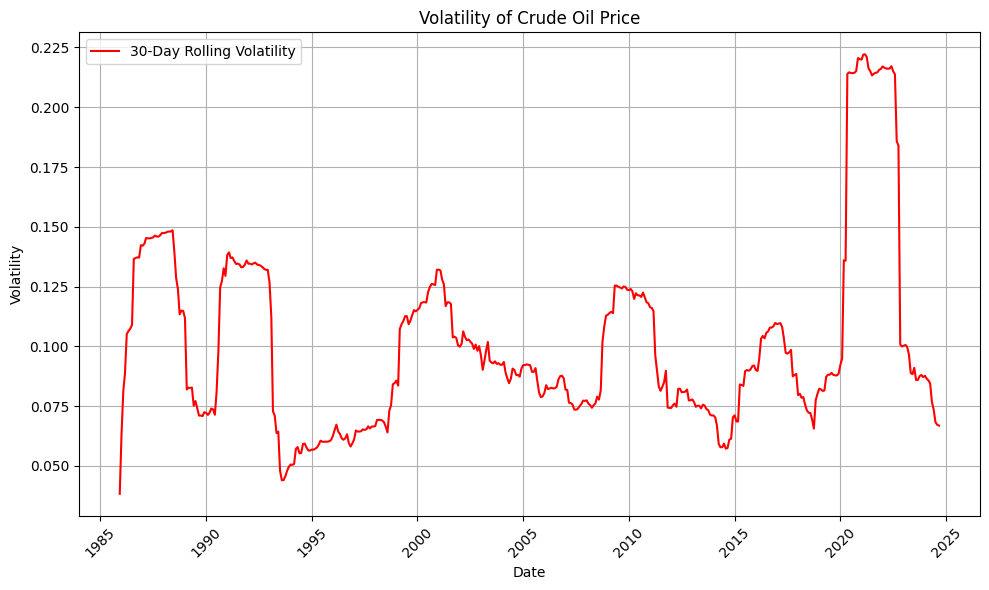

In [125]:
import pandas as pd
import matplotlib.pyplot as plt

# Reset the index to make 'date' a regular column again
oil_df.reset_index(inplace=True)

# Ensure 'date' is in datetime format
oil_df['date'] = pd.to_datetime(oil_df['date'], errors='coerce')
oil_df.set_index('date', inplace=True)

# Calculate daily returns
oil_df['daily_return'] = oil_df['price'].pct_change()

# Calculate volatility (standard deviation of returns)
volatility = oil_df['daily_return'].rolling(window=30).std()

# Plot volatility
plt.figure(figsize=(10, 6))
plt.plot(oil_df.index, volatility, label='30-Day Rolling Volatility', color='red')
plt.title('Volatility of Crude Oil Price')
plt.xlabel('Date')
plt.ylabel('Volatility')
plt.grid(True)
plt.legend()
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

#Forecasting with ARIMA


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


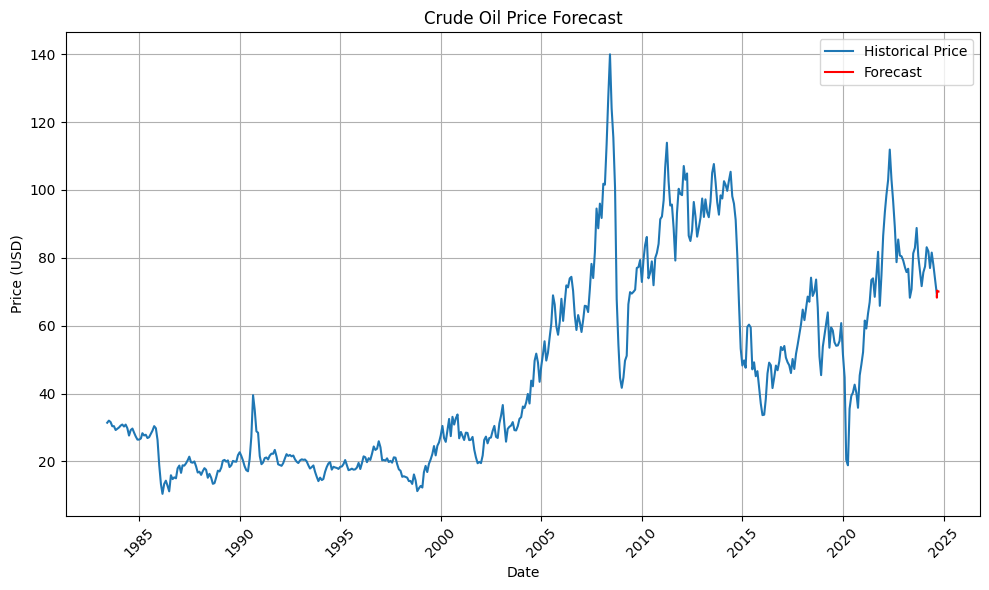

In [129]:
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.arima.model import ARIMA # import from the new module

# Reset the index to make 'date' a regular column
oil_df.reset_index(inplace=True)

# Ensure 'date' is in datetime format
oil_df['date'] = pd.to_datetime(oil_df['date'], errors='coerce')
oil_df.set_index('date', inplace=True)

# Fit ARIMA model
model = ARIMA(oil_df['price'], order=(5, 1, 0))  # Adjust parameters as needed
fitted_model = model.fit() # removed disp parameter

# Forecast
forecast = fitted_model.forecast(steps=30)

# Plot the results
plt.figure(figsize=(10, 6))
plt.plot(oil_df.index, oil_df['price'], label='Historical Price')

# Check pandas version and use appropriate argument
if pd.__version__ >= '1.4.0':
    plt.plot(pd.date_range(start=oil_df.index[-1], periods=31, inclusive='right'), forecast, label='Forecast', color='red')
else:
    plt.plot(pd.date_range(start=oil_df.index[-1], periods=31, closed='right'), forecast, label='Forecast', color='red')

plt.title('Crude Oil Price Forecast')
plt.xlabel('Date')
plt.ylabel('Price (USD)')
plt.grid(True)
plt.legend()
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

#Anomaly Detection


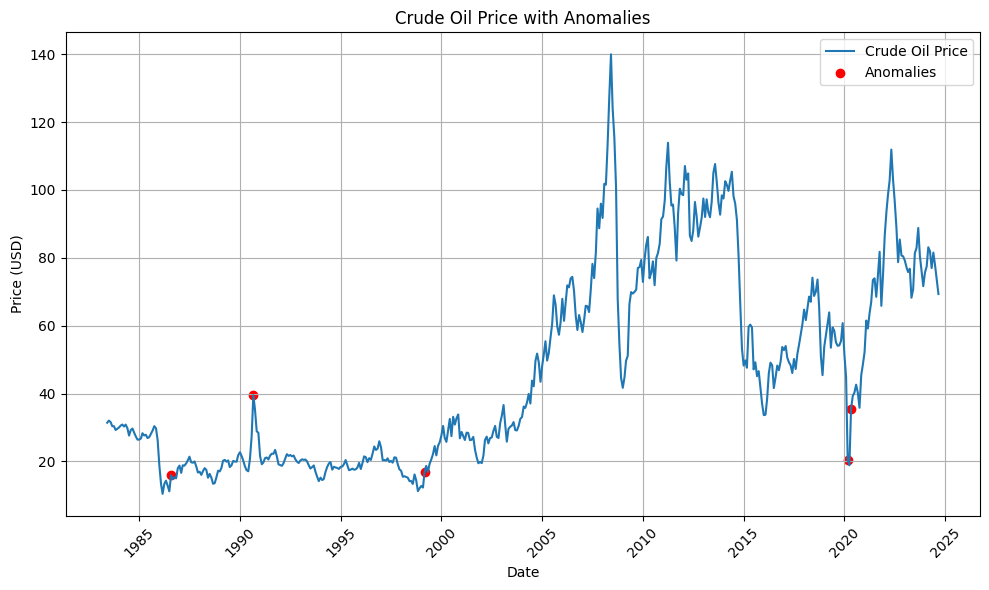

In [136]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.ensemble import IsolationForest

# Reset the index to make 'date' a regular column again
oil_df.reset_index(inplace=True)

# Convert 'date' column to datetime format
oil_df['date'] = pd.to_datetime(oil_df['date'])

# Set 'date' column as the index
oil_df.set_index('date', inplace=True)

# Calculate daily returns
oil_df['daily_return'] = oil_df['price'].pct_change()

# Anomaly detection
model = IsolationForest(contamination=0.01)

# Fit the model on the DataFrame without NaN values and store the results in a separate variable
anomaly_predictions = model.fit_predict(oil_df[['daily_return']].dropna())

# Use the index of the DataFrame used for fitting to align the values correctly.
oil_df['anomaly'] = pd.Series(anomaly_predictions, index=oil_df[['daily_return']].dropna().index)

# Plot results
plt.figure(figsize=(10, 6))
plt.plot(oil_df.index, oil_df['price'], label='Crude Oil Price')
plt.scatter(oil_df.index[oil_df['anomaly'] == -1], oil_df['price'][oil_df['anomaly'] == -1], color='red', label='Anomalies')
plt.title('Crude Oil Price with Anomalies')
plt.xlabel('Date')
plt.ylabel('Price (USD)')
plt.grid(True)
plt.legend()
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

#Feature Engineering

In [138]:
import pandas as pd

# Create additional features
oil_df['price_diff'] = oil_df['price'].diff()
oil_df['price_change'] = oil_df['price'].pct_change()

# Show the updated DataFrame with new features
print(oil_df.head())

            index  price  percentChange  change price_category  price_30_MA  \
date                                                                          
1983-06-01      0  31.38            NaN     NaN            Low          NaN   
1983-07-01      1  32.00          1.976    0.62            Low          NaN   
1983-08-01      2  31.59         -1.281   -0.41            Low          NaN   
1983-09-01      3  30.36         -3.894   -1.23            Low          NaN   
1983-10-01      4  30.37          0.033    0.01            Low          NaN   

            daily_return  anomaly  price_diff  price_change  
date                                                         
1983-06-01           NaN      NaN         NaN           NaN  
1983-07-01      0.019758      1.0        0.62      0.019758  
1983-08-01     -0.012813      1.0       -0.41     -0.012813  
1983-09-01     -0.038936      1.0       -1.23     -0.038936  
1983-10-01      0.000329      1.0        0.01      0.000329  


#Trend Analysis

In [140]:
!pip install statsmodels

ADF Statistic: -2.321402672978311
p-value: 0.16515806312549647


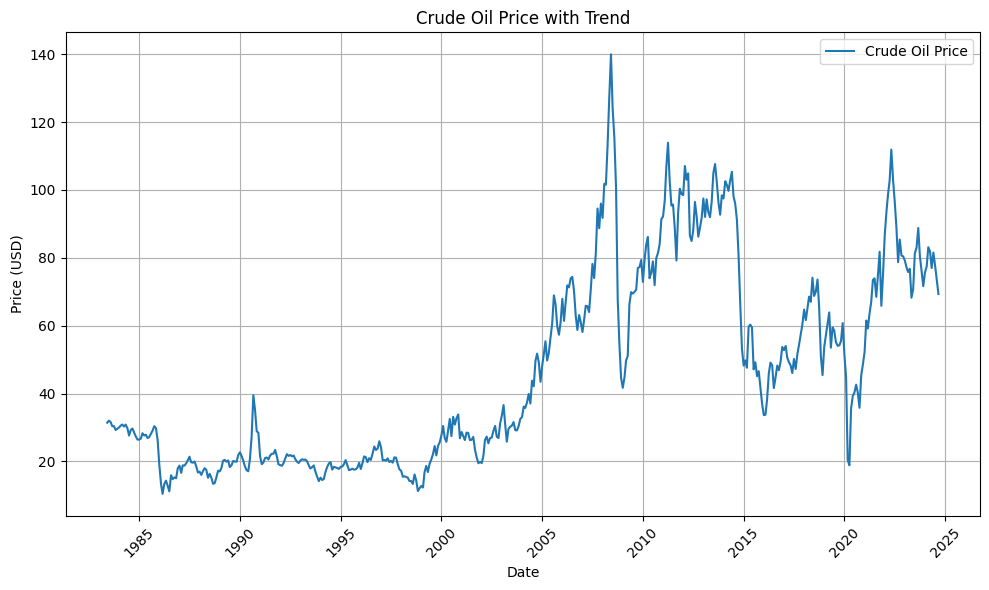

In [143]:
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.stattools import adfuller

# 'date' is already the index, so we reset it to a column
oil_df.reset_index(inplace=True)

# Ensure 'date' is in datetime format
oil_df['date'] = pd.to_datetime(oil_df['date'], errors='coerce')
oil_df.set_index('date', inplace=True)

# Perform ADF test for stationarity
result = adfuller(oil_df['price'].dropna())
print(f'ADF Statistic: {result[0]}')
print(f'p-value: {result[1]}')

# Plot price and trend line
plt.figure(figsize=(10, 6))
plt.plot(oil_df.index, oil_df['price'], label='Crude Oil Price')
plt.title('Crude Oil Price with Trend')
plt.xlabel('Date')
plt.ylabel('Price (USD)')
plt.grid(True)
plt.legend()
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

#Volatility Clustering

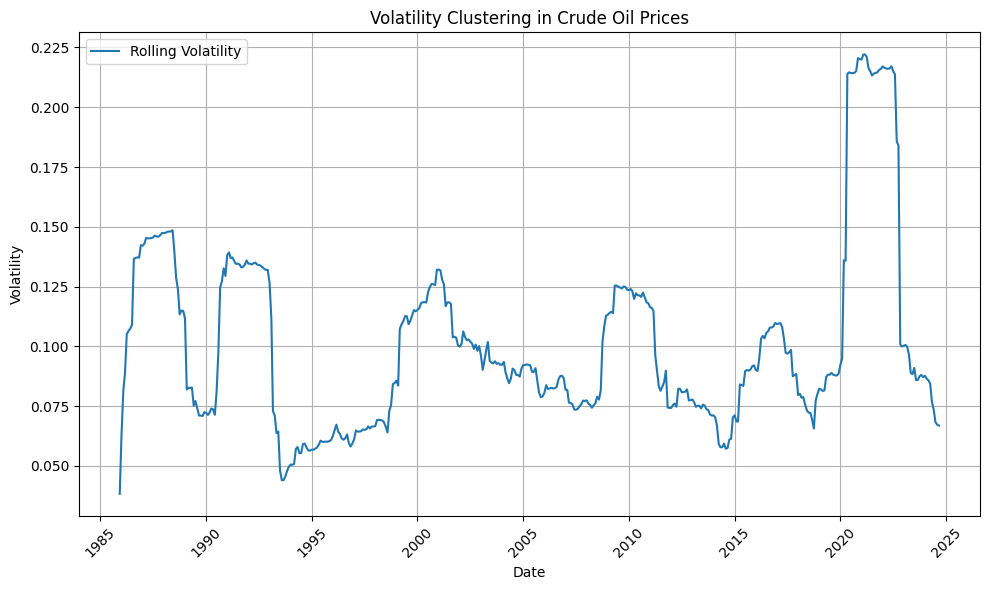

In [146]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Ensure 'date' is in datetime format
oil_df['date'] = pd.to_datetime(oil_df['date'], errors='coerce')
oil_df.set_index('date', inplace=True)

# Calculate daily returns and rolling volatility
oil_df['daily_return'] = oil_df['price'].pct_change()
rolling_volatility = oil_df['daily_return'].rolling(window=30).std()

# Plot volatility clustering
plt.figure(figsize=(10, 6))
plt.plot(oil_df.index, rolling_volatility, label='Rolling Volatility')
plt.title('Volatility Clustering in Crude Oil Prices')
plt.xlabel('Date')
plt.ylabel('Volatility')
plt.grid(True)
plt.legend()
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


#Interactive Visualizations

In [150]:
import pandas as pd
import plotly.graph_objects as go

# Load the dataset
# oil_df = pd.read_csv('crude_oil_price.csv')

# Check if 'date' exists as a column. If not, it might be the index
if 'date' not in oil_df.columns:
    # If 'date' is the index, reset it to a column
    oil_df.reset_index(inplace=True)

# Ensure 'date' is in datetime format
oil_df['date'] = pd.to_datetime(oil_df['date'], errors='coerce')

# Create the interactive line plot with Plotly
fig = go.Figure()

# Add crude oil price trace
fig.add_trace(go.Scatter(x=oil_df['date'], y=oil_df['price'], mode='lines', name='Crude Oil Price'))

# Add 30-day moving average trace
# Check if 'price_30_MA' column exists before adding the trace
if 'price_30_MA' in oil_df.columns:
    fig.add_trace(go.Scatter(x=oil_df['date'], y=oil_df['price_30_MA'], mode='lines', name='30-Day Moving Average', line=dict(dash='dash')))

# Update layout
fig.update_layout(title='Crude Oil Price and 30-Day Moving Average',
                  xaxis_title='Date',
                  yaxis_title='Price (USD)',
                  template='plotly_dark')

# Show the interactive plot
fig.show()

/usr/local/lib/python3.10/dist-packages/_plotly_utils/basevalidators.py:105: FutureWarning:

The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result



#Heatmap of Price Correlation

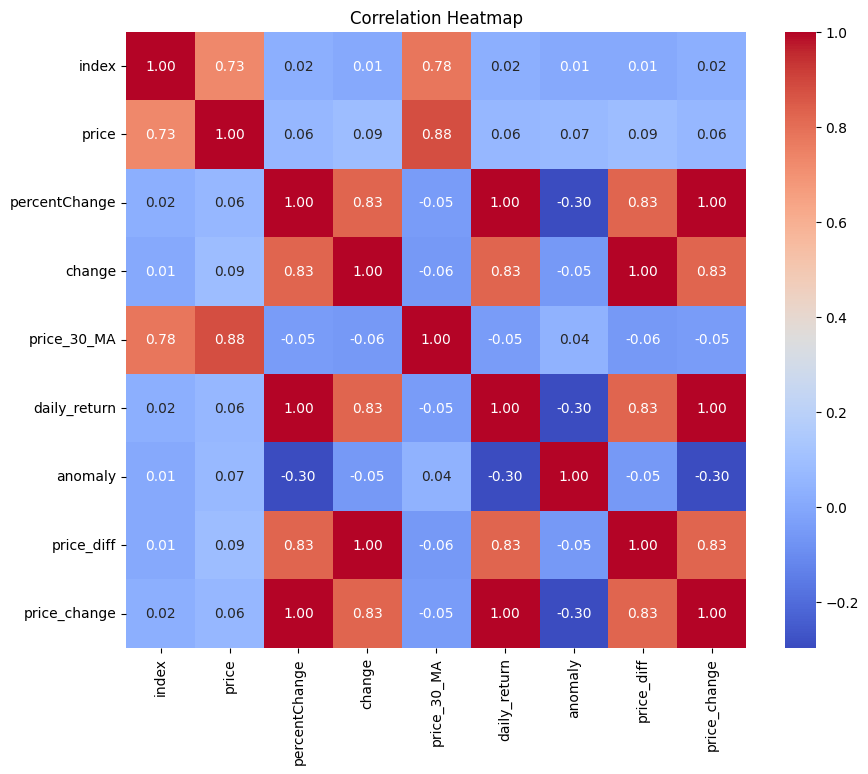

In [155]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load the dataset
# oil_df = pd.read_csv('crude_oil_price.csv')

# Check if 'date' is already the index
if 'date' not in oil_df.columns:
    # If 'date' is the index, reset it to a column
    oil_df.reset_index(inplace=True)

# Ensure 'date' is in datetime format
oil_df['date'] = pd.to_datetime(oil_df['date'], errors='coerce')
oil_df.set_index('date', inplace=True)

# Calculate daily returns if needed
oil_df['daily_return'] = oil_df['price'].pct_change()

# Remove non-numeric columns before calculating correlation
numeric_df = oil_df.select_dtypes(include=['number'])

# Create a correlation matrix
corr_matrix = numeric_df.corr()

# Plot heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Heatmap')
plt.show()

#Histogram of Price Distribution

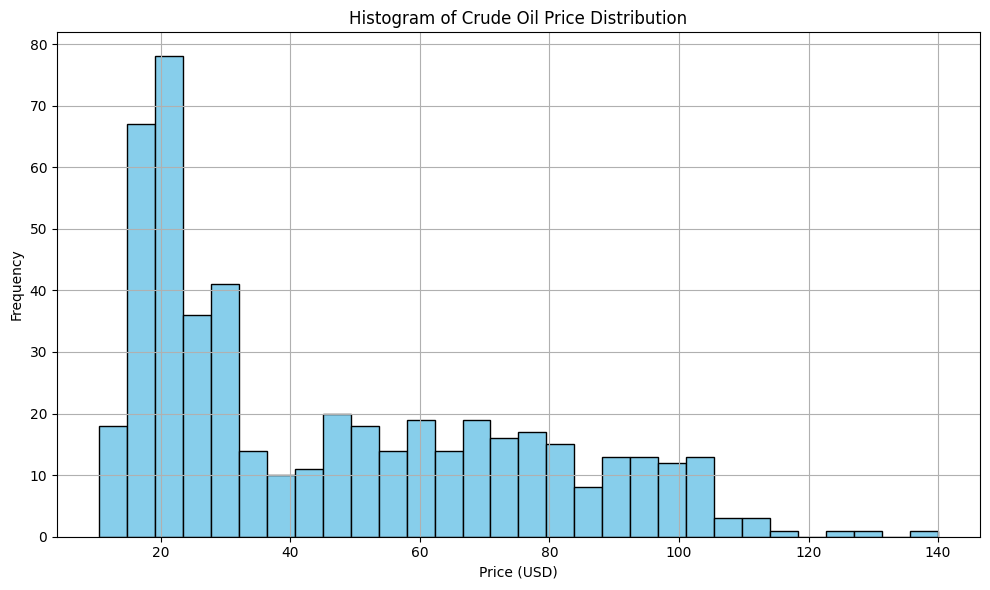

In [157]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the dataset
# oil_df = pd.read_csv('crude_oil_price.csv')

# Check if 'date' is already the index
if 'date' not in oil_df.columns:
    # If 'date' is the index, reset it to a column
    oil_df.reset_index(inplace=True)

# Ensure 'date' is in datetime format
oil_df['date'] = pd.to_datetime(oil_df['date'], errors='coerce')

# Plot histogram of price distribution
plt.figure(figsize=(10, 6))
plt.hist(oil_df['price'].dropna(), bins=30, edgecolor='black', color='skyblue')
plt.title('Histogram of Crude Oil Price Distribution')
plt.xlabel('Price (USD)')
plt.ylabel('Frequency')
plt.grid(True)
plt.tight_layout()
plt.show()

# Box Plot of Price by Month

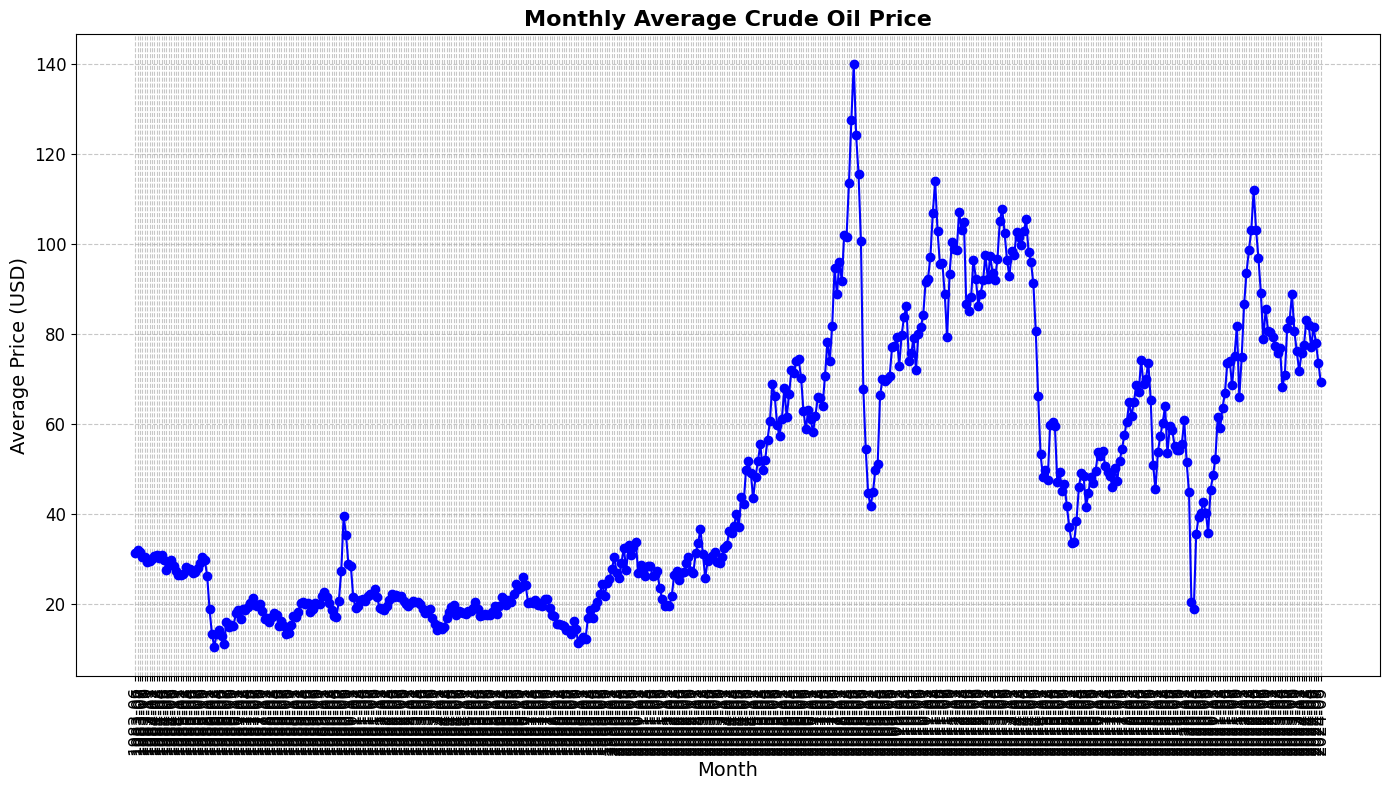

In [169]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the dataset
# oil_df = pd.read_csv('crude_oil_price.csv')

# Ensure 'date' is in datetime format
oil_df['date'] = pd.to_datetime(oil_df['date'], errors='coerce')
oil_df['month'] = oil_df['date'].dt.to_period('M')

# Calculate monthly average price
monthly_avg = oil_df.groupby('month')['price'].mean()

# Plot monthly average price
plt.figure(figsize=(14, 8))
plt.plot(monthly_avg.index.astype(str), monthly_avg, marker='o', linestyle='-', color='b')

# Improve readability with enhanced styling
plt.title('Monthly Average Crude Oil Price', fontsize=16, fontweight='bold')
plt.xlabel('Month', fontsize=14)
plt.ylabel('Average Price (USD)', fontsize=14)
plt.xticks(rotation=90, fontsize=12)
plt.yticks(fontsize=12)
plt.grid(True, linestyle='--', alpha=0.7)

plt.tight_layout()
plt.show()

#Cumulative Return Analysis

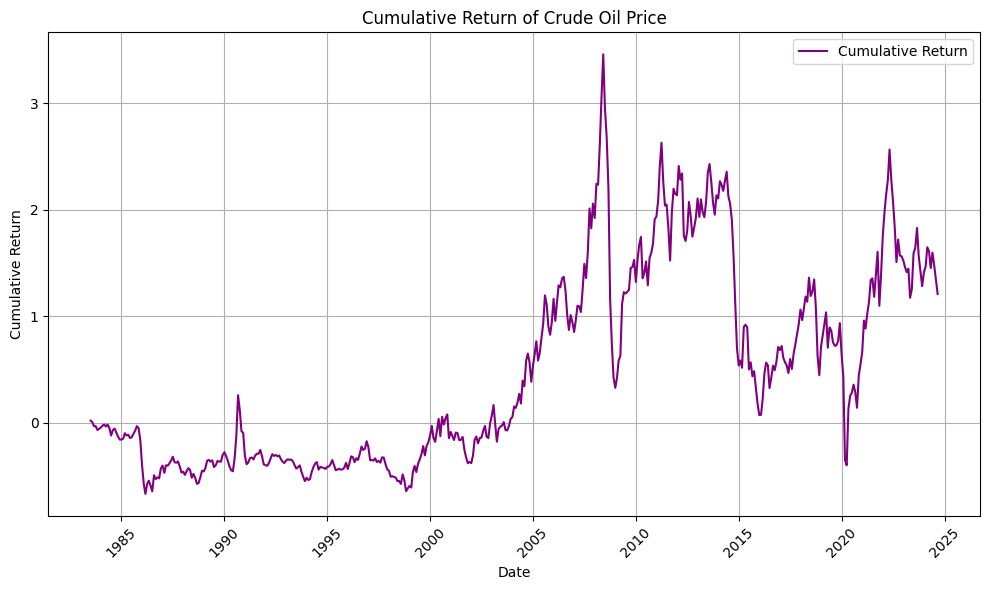

In [170]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the dataset
# oil_df = pd.read_csv('crude_oil_price.csv')

# Ensure 'date' is in datetime format
oil_df['date'] = pd.to_datetime(oil_df['date'], errors='coerce')
oil_df.set_index('date', inplace=True)

# Calculate daily returns and cumulative returns
oil_df['daily_return'] = oil_df['price'].pct_change()
oil_df['cumulative_return'] = (1 + oil_df['daily_return']).cumprod() - 1

# Plot cumulative return
plt.figure(figsize=(10, 6))
plt.plot(oil_df.index, oil_df['cumulative_return'], label='Cumulative Return', color='purple')
plt.title('Cumulative Return of Crude Oil Price')
plt.xlabel('Date')
plt.ylabel('Cumulative Return')
plt.grid(True)
plt.legend()
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


#Rolling Statistics Plot


<ipython-input-173-5dc4d74dc1dc>:9: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

<ipython-input-173-5dc4d74dc1dc>:12: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

<ipython-input-173-5dc4d74dc1dc>:16: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

<ipython-input-173-5

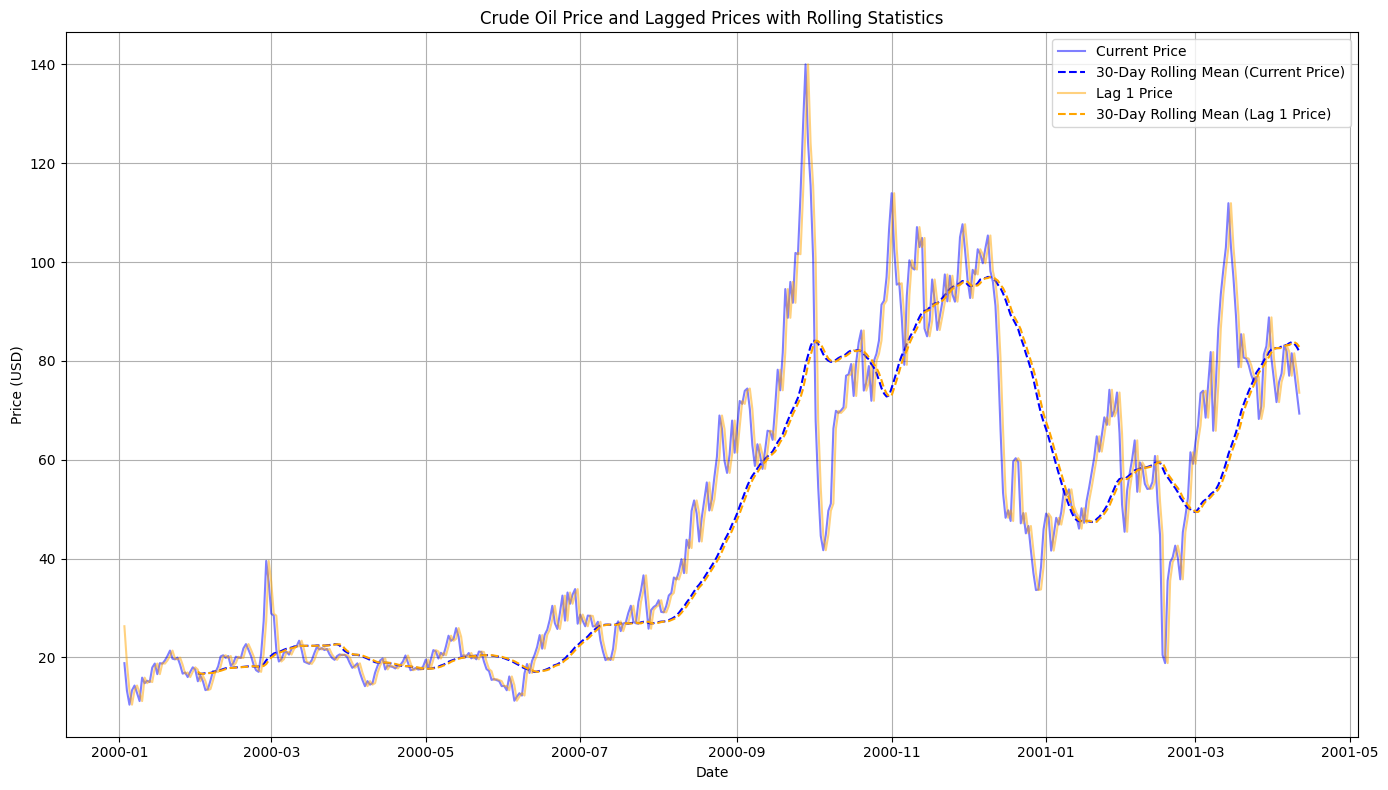

In [173]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the dataset
# oil_df = pd.read_csv('crude_oil_price.csv')

# Check if 'date' column exists. If not, create it based on available data or index
if 'date' not in oil_df.columns:
    oil_df['date'] = pd.date_range(start='2000-01-01', periods=len(oil_df), freq='D')

# Ensure 'date' is in datetime format
oil_df['date'] = pd.to_datetime(oil_df['date'], errors='coerce')
oil_df.set_index('date', inplace=True)

# Create lag features
oil_df['price_lag_1'] = oil_df['price'].shift(1)
oil_df['price_lag_2'] = oil_df['price'].shift(2)

# Drop rows with NaN values
oil_df = oil_df.dropna()

# Calculate rolling statistics
oil_df['price_rolling_mean'] = oil_df['price'].rolling(window=30).mean()
oil_df['price_lag_1_rolling_mean'] = oil_df['price_lag_1'].rolling(window=30).mean()

# Plot rolling statistics
plt.figure(figsize=(14, 8))
plt.plot(oil_df.index, oil_df['price'], label='Current Price', color='blue', alpha=0.5)
plt.plot(oil_df.index, oil_df['price_rolling_mean'], label='30-Day Rolling Mean (Current Price)', color='blue', linestyle='--')
plt.plot(oil_df.index, oil_df['price_lag_1'], label='Lag 1 Price', color='orange', alpha=0.5)
plt.plot(oil_df.index, oil_df['price_lag_1_rolling_mean'], label='30-Day Rolling Mean (Lag 1 Price)', color='orange', linestyle='--')

plt.title('Crude Oil Price and Lagged Prices with Rolling Statistics')
plt.xlabel('Date')
plt.ylabel('Price (USD)')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()
